# Prediction of Credit Risk

### Part 3: Explaining Selected Models Using SHAP

### Load the Libaries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
import shap
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline

from ipynb.fs.defs.func import histogram, measures, evaluation_plot 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline

### Load Preprocessed Dataset

In [46]:
with open('x_train.pickle', 'rb')as file:
    x_train=pickle.load(file)
    
with open('x_test.pickle', 'rb')as file:
    x_test=pickle.load(file)
    
with open('y_train.pickle', 'rb')as file:
    y_train=pickle.load(file)
    
with open('y_test.pickle', 'rb')as file:
    y_test=pickle.load(file)

### Exproting SHAP Values for Interpretation

In [49]:
def result(x_test, shap_val_AB, modelname):
    result_matrix = np.zeros((len(x_test), len(x_test.columns)))

    for i in range(len(x_test)):
        for j in range(len(x_test.columns)):
            result_matrix[i][j] = shap_val_AB[i][j]
            file_name = f'Credit{modelname}.csv'       
            df = pd.DataFrame(result_matrix, columns=x_test.columns)
            df.to_csv(""+ file_name)

### Loading Models

In [52]:
with open('German_MLP.pkl', 'rb')as file:
    MLP=pickle.load(file)

AttributeError: Can't get attribute '_PredictScorer' on <module 'sklearn.metrics._scorer' from 'C:\\Users\\acer\\anaconda3\\Lib\\site-packages\\sklearn\\metrics\\_scorer.py'>

## SHAP

In [12]:
ex_MLP= shap.KernelExplainer(MLP.predict, x_test)
shap_val_MLP = ex_MLP.shap_values(x_test)

Using 180 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/180 [00:00<?, ?it/s]

In [13]:
shap.initjs()
shap.force_plot(ex_MLP.expected_value, pd.DataFrame(shap_val_MLP).values, x_test, feature_names= x_test.columns)

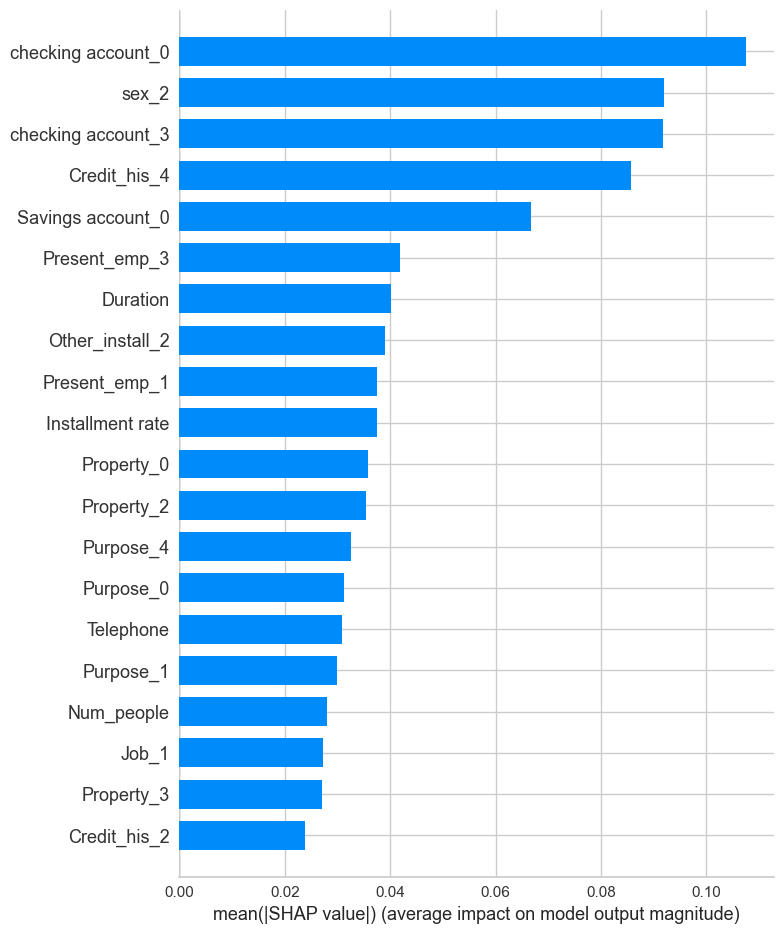

In [14]:
shap.summary_plot(shap_val_MLP, x_test, plot_type = 'bar')

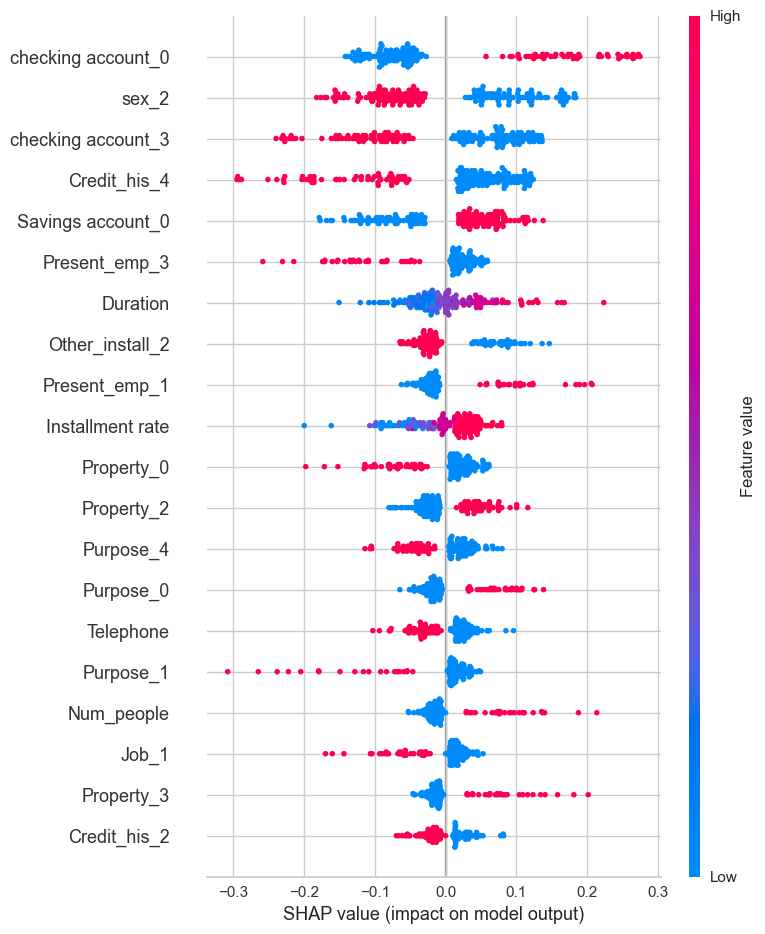

In [15]:
shap.summary_plot(shap_val_MLP, x_test)

In [16]:
result_MLP = result(x_test, shap_val_MLP, '_MLP')

In [56]:
values=pd.read_excel(r'D:\Learn\master\Projects\German Statlog\modification\Credit_MLP.xlsx', sheet_name='Credit_MLP')
values

,Duration,Credit amount,Installment rate,Present_resid,Age,Num_credits,Num_people,Telephone,Foreign worker,checking account_0,...,Other_install_1,Other_install_2,Housing_0,Housing_1,Housing_2,Job_0,Job_1,Job_2,Job_3,Class
0,0.001242,-0.022630,-0.016252,0.029909,0.001474,-0.000752,0.075671,0.027515,0.003855,-0.091907,...,0.005976,0.052255,-0.008072,-0.008381,-0.009829,-0.001336,0.007173,-0.005523,-0.010943,0
1,-0.029020,-0.010997,-0.004580,-0.005664,-0.012703,-0.001906,0.041852,0.012973,-0.079473,0.057024,...,0.001731,-0.015681,-0.008319,-0.003766,-0.003814,0.000000,0.008405,-0.003089,-0.008403,0
2,-0.100994,0.004686,-0.100728,0.031989,-0.011335,-0.016404,0.103679,0.058879,0.014085,0.154308,...,0.000000,-0.064369,0.060998,0.029475,-0.021724,0.006675,0.020544,0.006384,-0.027629,0
3,-0.050697,-0.023963,0.046828,0.028187,0.000000,0.002749,-0.024307,-0.043780,0.003678,-0.068988,...,0.001391,0.086449,-0.014812,-0.009036,-0.003932,0.000000,0.028161,0.011352,0.061116,0
4,-0.020747,0.002816,-0.032207,-0.005725,-0.020774,0.000000,-0.006095,0.014545,-0.001257,-0.041890,...,0.000000,-0.012916,-0.005213,-0.002751,-0.001864,0.000000,-0.027468,0.006376,-0.007621,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-0.011910,-0.016840,0.035295,0.036331,0.000000,0.010265,-0.032070,-0.077754,0.004130,-0.107752,...,0.000000,-0.048916,-0.029034,-0.008935,-0.005101,0.008598,0.023457,0.016242,0.071561,1
176,-0.040660,-0.009066,-0.003519,-0.011454,-0.023150,0.007194,-0.017822,0.018938,-0.001521,0.080433,...,-0.000888,-0.024978,-0.011146,-0.007154,-0.005514,-0.003451,-0.058107,0.010184,-0.011595,1
177,-0.020702,-0.000595,0.016714,0.007084,0.001748,0.003005,-0.014102,-0.027765,0.000000,-0.063829,...,0.003655,-0.024329,-0.006834,0.008927,0.024161,0.000000,0.009966,-0.002717,-0.009003,0
178,-0.017867,0.010905,-0.004901,0.005152,0.002654,0.002763,-0.009527,-0.019443,0.003279,-0.061980,...,0.001185,-0.018814,-0.008372,-0.002781,-0.003081,0.002316,0.006676,-0.006920,-0.008229,0


In [58]:
Class1=values.loc[values['Class']==1].drop('Class',axis=1)
Class1

,Duration,Credit amount,Installment rate,Present_resid,Age,Num_credits,Num_people,Telephone,Foreign worker,checking account_0,...,Other_install_0,Other_install_1,Other_install_2,Housing_0,Housing_1,Housing_2,Job_0,Job_1,Job_2,Job_3
7,0.049093,0.000000,0.035440,-0.013392,0.006090,0.001718,-0.007564,-0.030432,0.005879,0.138515,...,-0.005144,0.000000,-0.014975,-0.007073,-0.002685,0.002324,-0.005784,0.015385,-0.008489,-0.008567
14,-0.073103,-0.041240,-0.066689,0.032102,0.024271,0.009302,-0.022252,0.031915,0.000000,-0.135362,...,-0.029813,-0.051565,0.077032,-0.017509,-0.004459,-0.009304,0.002852,0.024380,0.000000,-0.021346
19,0.003499,0.000000,0.031759,-0.017473,-0.001832,0.000000,0.075504,-0.029133,0.009459,0.155544,...,-0.011614,0.000000,-0.020127,-0.007111,0.015661,0.040310,0.012224,0.019393,-0.002809,-0.005863
22,-0.012720,-0.012972,0.066345,-0.012392,0.027735,-0.012292,-0.022098,0.061654,-0.014312,0.229466,...,-0.024922,0.021106,-0.023930,0.151680,0.022594,-0.003662,-0.004373,0.031506,-0.015582,-0.010738
27,0.043641,0.019207,0.017135,-0.024017,-0.039156,-0.007367,-0.025540,0.095820,0.011435,-0.100861,...,-0.014439,0.000000,-0.035340,0.000000,0.008095,0.050518,0.008517,0.045851,-0.023176,-0.012017
28,0.043619,0.012764,-0.044681,0.011331,0.001807,0.000921,-0.017493,-0.031609,0.000000,-0.094956,...,-0.012308,0.002878,-0.030159,-0.009752,0.014046,0.031835,0.003818,0.013423,0.013110,0.043102
34,-0.059395,-0.033117,0.044790,0.021633,0.019592,0.001242,-0.022054,0.042778,0.004291,0.264589,...,-0.015739,0.009005,-0.021644,-0.016896,-0.008869,-0.005953,0.000000,-0.093039,0.009764,-0.010793
35,-0.040404,-0.010551,-0.023415,0.006505,0.001726,-0.002127,-0.012172,0.014955,0.000000,-0.054488,...,-0.013357,0.000000,-0.020677,0.030117,0.007959,-0.001721,0.001487,0.005589,0.000000,-0.010837
36,0.000000,-0.005029,0.013179,-0.006743,-0.003629,-0.002287,0.029048,-0.010704,0.000000,-0.034775,...,-0.006924,0.000000,-0.010168,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.006187
38,0.010527,-0.014625,-0.090997,0.015086,-0.006397,0.000000,-0.017191,0.028209,0.004268,0.262442,...,-0.022351,0.000000,-0.025071,-0.016144,0.000000,-0.003875,0.004881,0.023783,-0.009673,-0.012974


In [60]:
def count_shap_values(shap_values, feature_names):

    # Ensure shap_values is a NumPy array
    shap_values = np.array(shap_values)

    # Initialize a DataFrame to store the counts for each feature
    shap_counts = pd.DataFrame(index=['positive', 'negative', 'zero'], columns=feature_names)

    # Count positive, negative, and zero values for each feature
    shap_counts.loc['positive'] = (shap_values > 0).sum(axis=0)
    shap_counts.loc['negative'] = (shap_values < 0).sum(axis=0)
    shap_counts.loc['zero'] = (shap_values == 0).sum(axis=0)

    return shap_counts

# Features to Select
## Class 1 (Good Risk)

In [62]:
shap_counts = count_shap_values(Class1, x_test.columns)
shap_counts_sorted_positive = shap_counts.sort_values(by='positive', axis=1, ascending=False).T
shap_counts_sorted_positive

,positive,negative,zero
Purpose_1,48,8,0
Job_1,47,8,1
Present_emp_3,47,9,0
Property_0,45,11,0
checking account_2,43,7,6
Savings account_4,40,12,4
Credit_his_4,40,16,0
other_debtor_2,39,6,11
checking account_3,39,17,0
Savings account_0,36,20,0


# Features to Eliminate

In [64]:
shap_counts_sorted_negative = shap_counts.sort_values(by='negative', axis=1, ascending=False).T
shap_counts_sorted_negative

,positive,negative,zero
Purpose_9,3,53,0
Savings account_1,4,52,0
Credit_his_1,5,49,2
Purpose_0,7,49,0
Num_people,7,48,1
Housing_0,7,47,2
Property_3,10,46,0
Other_install_0,11,45,0
Present_emp_1,11,45,0
Job_3,8,45,3


# Features to Select
## Class 0 (Bad Risk)

In [71]:
Class0 = values.loc[values['Class']==0].drop('Class',axis=1)
Class0

,Duration,Credit amount,Installment rate,Present_resid,Age,Num_credits,Num_people,Telephone,Foreign worker,checking account_0,...,Other_install_0,Other_install_1,Other_install_2,Housing_0,Housing_1,Housing_2,Job_0,Job_1,Job_2,Job_3
0,0.001242,-0.022630,-0.016252,0.029909,0.001474,-0.000752,0.075671,0.027515,0.003855,-0.091907,...,0.047276,0.005976,0.052255,-0.008072,-0.008381,-0.009829,-0.001336,0.007173,-0.005523,-0.010943
1,-0.029020,-0.010997,-0.004580,-0.005664,-0.012703,-0.001906,0.041852,0.012973,-0.079473,0.057024,...,-0.009324,0.001731,-0.015681,-0.008319,-0.003766,-0.003814,0.000000,0.008405,-0.003089,-0.008403
2,-0.100994,0.004686,-0.100728,0.031989,-0.011335,-0.016404,0.103679,0.058879,0.014085,0.154308,...,-0.030798,0.000000,-0.064369,0.060998,0.029475,-0.021724,0.006675,0.020544,0.006384,-0.027629
3,-0.050697,-0.023963,0.046828,0.028187,0.000000,0.002749,-0.024307,-0.043780,0.003678,-0.068988,...,0.057813,0.001391,0.086449,-0.014812,-0.009036,-0.003932,0.000000,0.028161,0.011352,0.061116
4,-0.020747,0.002816,-0.032207,-0.005725,-0.020774,0.000000,-0.006095,0.014545,-0.001257,-0.041890,...,-0.006500,0.000000,-0.012916,-0.005213,-0.002751,-0.001864,0.000000,-0.027468,0.006376,-0.007621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.130341,0.008982,0.046554,-0.035425,-0.005387,0.004329,0.123544,0.034085,-0.002592,-0.057434,...,-0.008558,0.009038,-0.025099,-0.010510,0.025391,0.054120,0.001661,-0.056503,-0.006073,-0.015222
174,0.107511,0.110970,0.004589,-0.012236,-0.029930,0.001686,-0.014227,-0.029937,0.006171,-0.046725,...,-0.013157,0.010302,-0.006123,0.042283,0.008929,-0.004476,0.000000,0.001665,-0.004331,-0.008809
177,-0.020702,-0.000595,0.016714,0.007084,0.001748,0.003005,-0.014102,-0.027765,0.000000,-0.063829,...,-0.012937,0.003655,-0.024329,-0.006834,0.008927,0.024161,0.000000,0.009966,-0.002717,-0.009003
178,-0.017867,0.010905,-0.004901,0.005152,0.002654,0.002763,-0.009527,-0.019443,0.003279,-0.061980,...,-0.009598,0.001185,-0.018814,-0.008372,-0.002781,-0.003081,0.002316,0.006676,-0.006920,-0.008229


In [73]:
shap_counts = count_shap_values(Class0, x_test.columns)
shap_counts_sorted_negative = shap_counts.sort_values(by='negative', axis=1, ascending=False).T
shap_counts_sorted_negative

,positive,negative,zero
Credit_his_1,8,113,3
Purpose_9,12,110,2
Property_3,18,106,0
Credit_his_0,11,105,8
Present_emp_1,19,105,0
Job_3,19,104,1
sex_0,12,103,9
Num_people,21,103,0
sex_3,18,102,4
Savings account_1,21,102,1


In [75]:
shap_counts_sorted_positive = shap_counts.sort_values(by='positive', axis=1, ascending=False).T
shap_counts_sorted_positive

,positive,negative,zero
Purpose_1,112,12,0
Present_emp_3,101,23,0
Job_1,94,30,0
Savings account_4,94,23,7
Property_0,92,32,0
checking account_1,86,29,9
Credit_his_4,84,40,0
other_debtor_2,82,11,31
Purpose_4,82,42,0
checking account_2,80,16,28
